In [1]:
import torch_geometric.explain as ex

In [2]:
import torch
from graph_class_gnn import Graph_Classification_GCN
model = Graph_Classification_GCN()
model.load_state_dict(torch.load('model/pgexp_model_red_ratio.pt'))


<All keys matched successfully>

In [3]:
explainer = ex.Explainer(
        model=model,
        algorithm=ex.PGExplainer(epochs=30, lr=0.003),
        explanation_type='phenomenon',
        edge_mask_type='object',
        model_config=ex.ModelConfig(mode="multiclass_classification", task_level="graph", return_type="raw"),
    )

In [4]:
datasetLoader = torch.load('model/pgexp_test_loader_red_ratio.pt')


In [5]:
dataset = datasetLoader.dataset


In [6]:
len(dataset)

8000

In [7]:
explainer.algorithm.train(model=model,x=dataset[0].x, edge_index=dataset[0].edge_index,epoch=30,target=dataset[0].y)

2.0231032371520996

In [8]:
expl1 =explainer(dataset[1].x,dataset[1].edge_index, target=[1])

In [9]:
print(expl1.edge_index)
print(expl1.x)

tensor([[0, 1, 1],
        [0, 0, 1]])
tensor([[0., 1., 0.],
        [0., 1., 0.]])


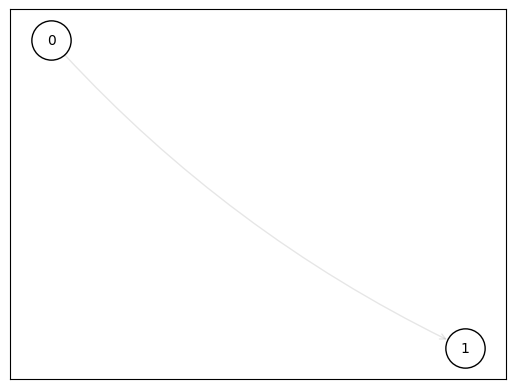

In [10]:
expl1.visualize_graph()